## Hieararchical Clustering

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
import pandas as pd
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.columns = ['ID','Gender','Age','Income','SpendScore' ]
df.head()

,ID,Gender,Age,Income,SpendScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.isna().sum()

ID            0
Gender        0
Age           0
Income        0
SpendScore    0
dtype: int64

## Cluster similar customers together on basis of income & spend

In [8]:
X = df[['Income','SpendScore']]

In [9]:
X.head()

,Income,SpendScore
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Preprocess X Data

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [12]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='median')),
                           ('scaler', StandardScaler())])


In [13]:
X_pre = num_pipe.fit_transform(X)

In [14]:
X_pre

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### Apply hiearchical clustering

In [16]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(X_pre)

AgglomerativeClustering(n_clusters=3)

In [18]:
lb = model.labels_

## Getting Silhoutte Score

In [19]:
from sklearn.metrics import silhouette_score
silhouette_score(X_pre,lb)

0.4610481446570447

In [20]:
cl = list(range(2,10))
cl

[2, 3, 4, 5, 6, 7, 8, 9]

In [21]:
from sklearn.metrics import silhouette_score
scores = []
for i in range(2,10):
    agc = AgglomerativeClustering(n_clusters=i)
    agc.fit(X_pre)
    lb = agc.labels_
    s = silhouette_score(X_pre,lb)
    scores.append(s)

In [22]:
scores

[0.3842337621772661,
 0.4610481446570447,
 0.4925507715349343,
 0.5538089226688662,
 0.5386761871036926,
 0.5197949293475768,
 0.4308617778221774,
 0.43768997758154127]

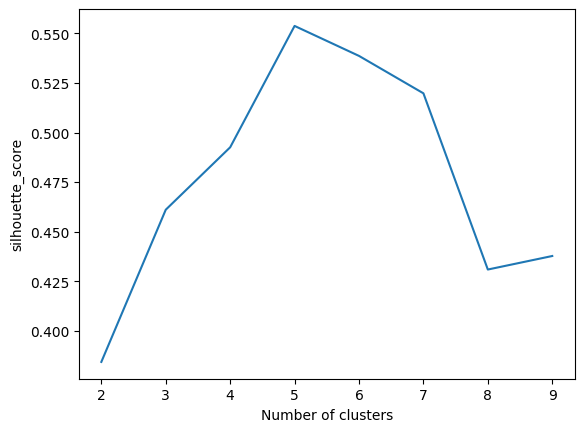

In [24]:
import matplotlib.pyplot as plt
plt.plot(list(range(2,10)),scores)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show()

## create final model with highest Silhoutte score

In [25]:
best_agc = AgglomerativeClustering(n_clusters=5)
best_agc.fit(X_pre)


AgglomerativeClustering(n_clusters=5)

In [26]:
final_lb = best_agc.labels_
final_lb

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

## Add this label to X

In [28]:
X['label'] = final_lb

C:\Users\Shree\AppData\Local\Temp\ipykernel_16780\2479747521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['label'] = final_lb


In [29]:
X

,Income,SpendScore,label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,0
197,126,74,1
198,137,18,0


In [30]:
for i in range(5):
    print(f'Customer Label: {i}\n')
    display(X[X['label']==i])
    print('\n=====================================\n')

Customer Label: 0



,Income,SpendScore,label
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0




Customer Label: 1



,Income,SpendScore,label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Customer Label: 2



,Income,SpendScore,label
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2




Customer Label: 3



,Income,SpendScore,label
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




Customer Label: 4



,Income,SpendScore,label
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


## Visualize the clusters

<Axes: xlabel='Income', ylabel='SpendScore'>

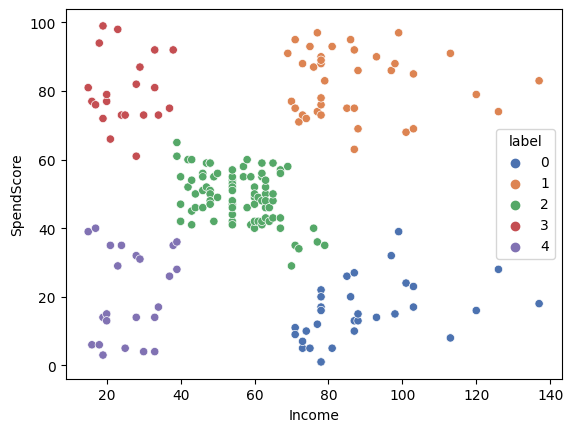

In [31]:
import seaborn as sns
sns.scatterplot(data=X, x = 'Income', y = 'SpendScore', hue= 'label', palette= 'deep')

### Dendogram Visualization

C:\Users\Shree\AppData\Local\Temp\ipykernel_16780\41017772.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkages = linkage(DM)


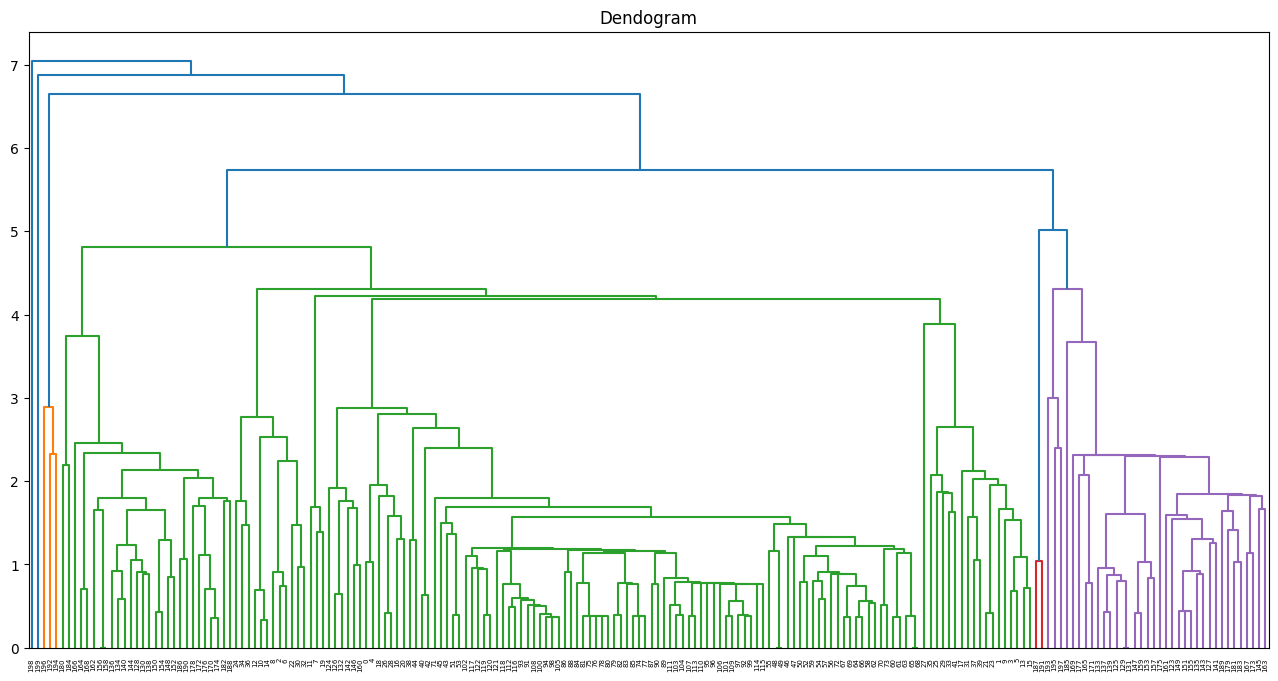

In [32]:
from scipy.spatial import distance_matrix
DM = distance_matrix(X_pre,X_pre)
from scipy.cluster.hierarchy import linkage
linkages = linkage(DM)
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(16,8))
plt.title('Dendogram')
Q = dendrogram(linkages)